<h1 style="color: green">Transfer Learning: practical application</h1>

### Pre-trained models are neural network models that have been trained on a large dataset, typically on a large-scale image classification task such as ImageNet. These models have learned to extract meaningful features from images and can be used as a starting point for various computer vision tasks

 <h1 style="color:red">Import libraries</h1>

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19,VGG16
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from PIL import Image
import random 
import os

<h1 style="color:red"> Import Dataset</h1>

In [5]:
train_data_dir = '/kaggle/input/apples-or-tomatoes-image-classification/train'
valid_data_dir = '/kaggle/input/apples-or-tomatoes-image-classification/test'

img_width, img_height = 224, 224
num_classes = 2

<h1 style="color:red"> Data visualization</h1>

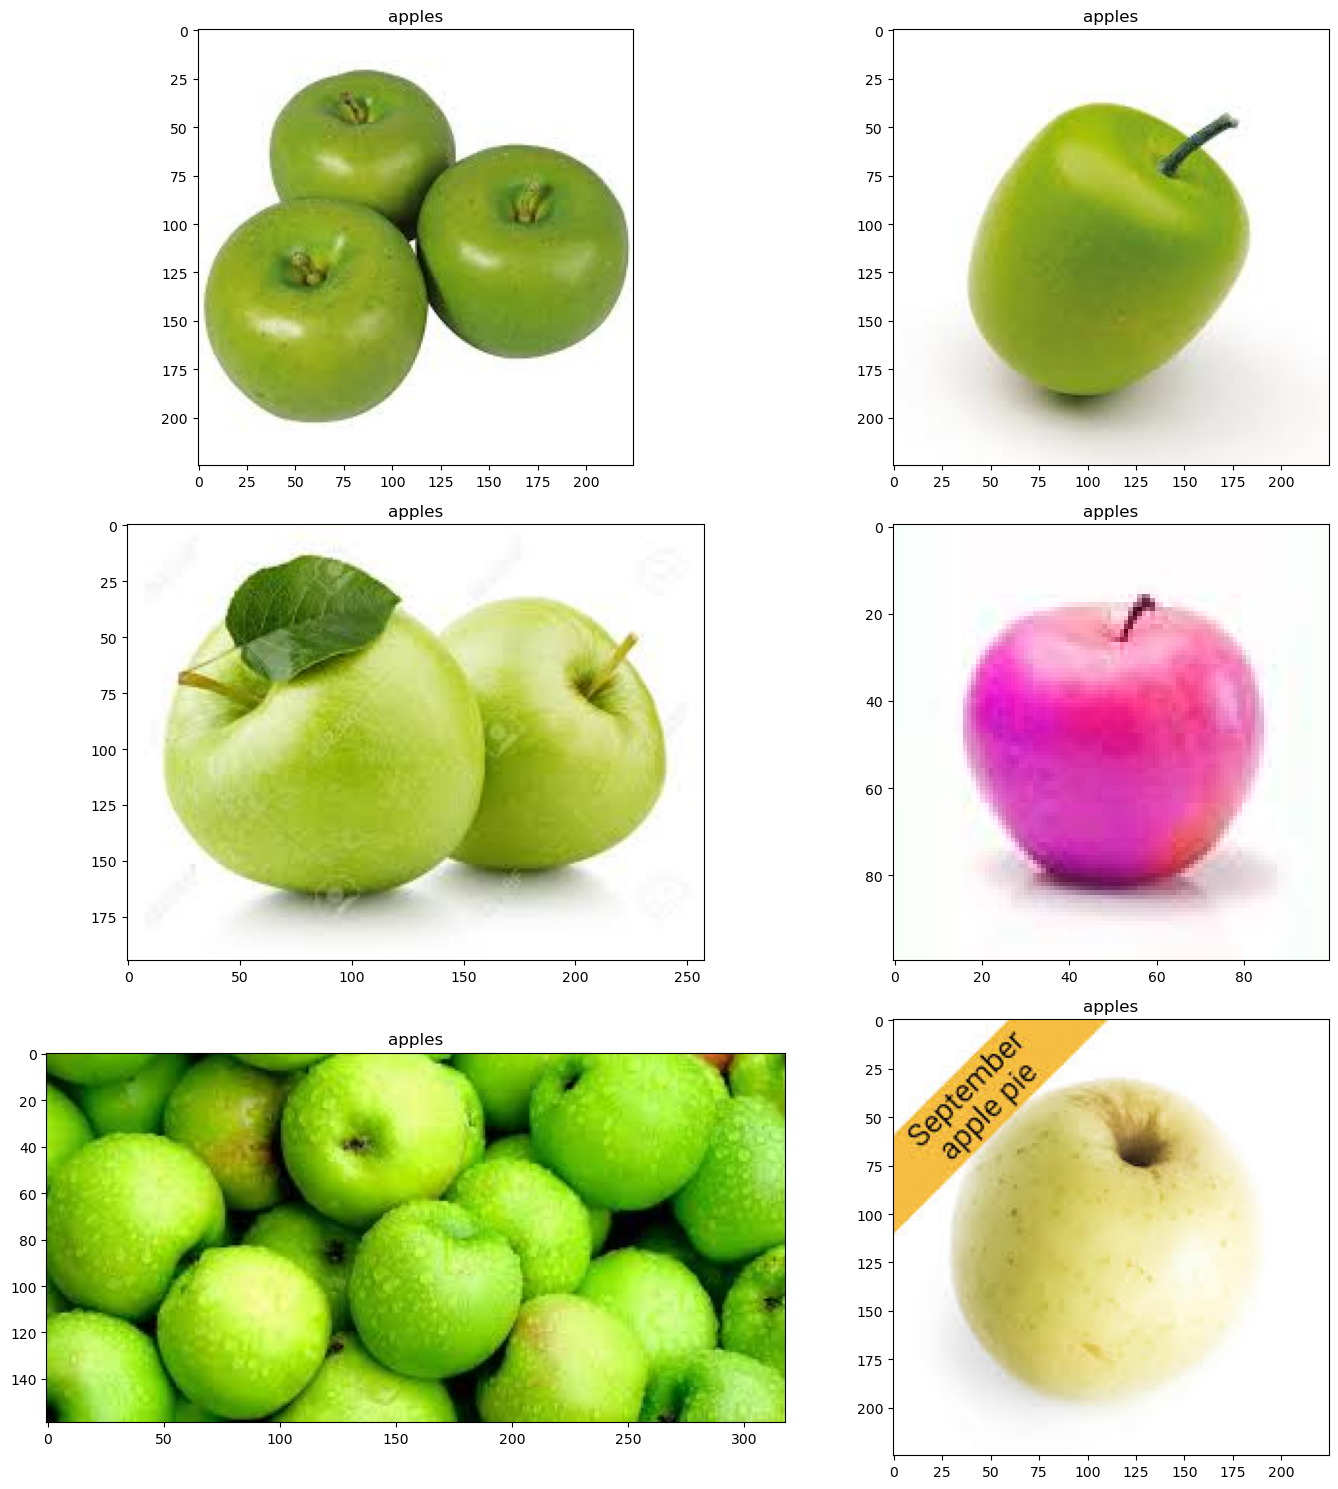

In [29]:

apple_folder = "/kaggle/input/apples-or-tomatoes-image-classification/train/apples"

apple_images = os.listdir(apple_folder)

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(15, 15)

for i in range(3):
    for j in range(2):
        random_image = random.choice(apple_images)
        image_path = os.path.join(apple_folder, random_image)

        img = Image.open(image_path)
        
        ax[i, j].imshow(img)
        ax[i, j].set_title("apples")

plt.tight_layout()
plt.show()


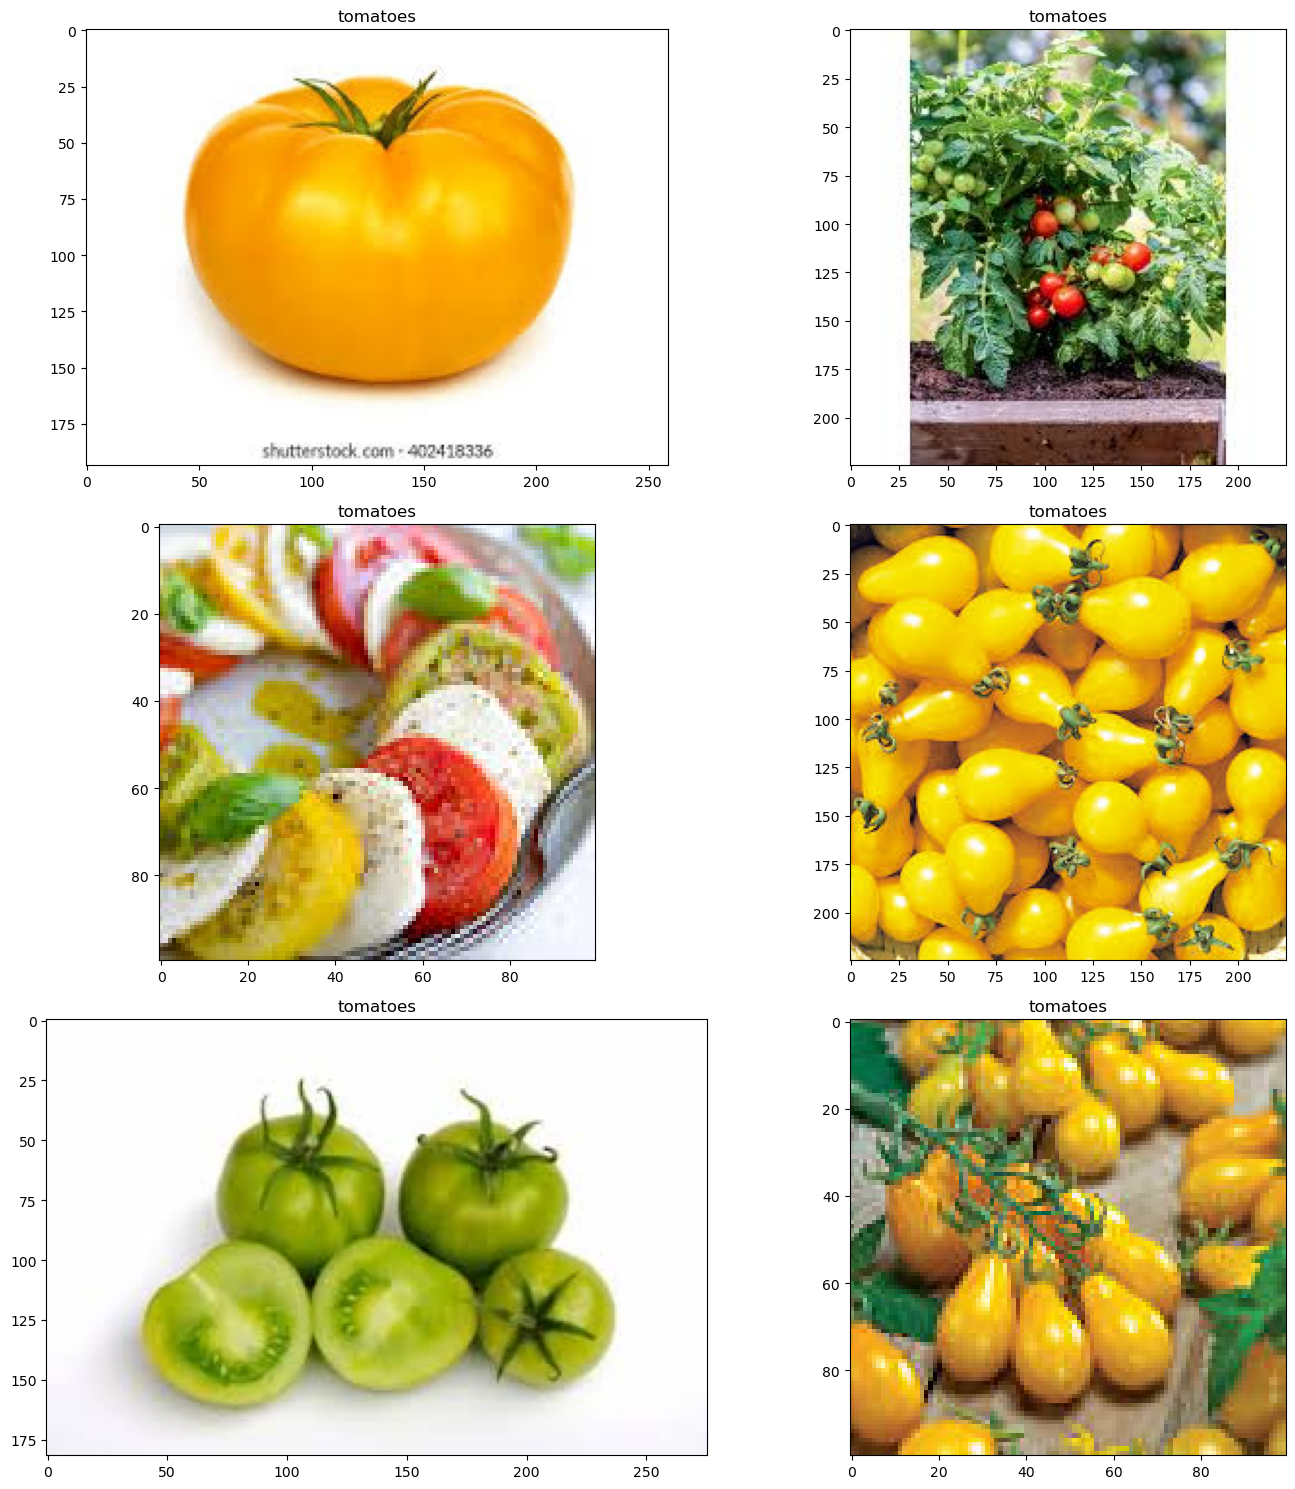

In [31]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

tomatoes_folder = "/kaggle/input/apples-or-tomatoes-image-classification/train/tomatoes"

tomatoes_images = os.listdir(tomatoes_folder)

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(15, 15)

for i in range(3):
    for j in range(2):
        random_image = random.choice(tomatoes_images)
        image_path = os.path.join(tomatoes_folder, random_image)

        img = Image.open(image_path)
        
        ax[i, j].imshow(img)
        ax[i, j].set_title("tomatoes")

plt.tight_layout()
plt.show()


 <h1 style="color:blue">ResNet50 example 1</h1>

## load pre-trained  model

In [32]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

# you can add "imagenet" for weights
weights="/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = ResNet50(weights=weights, include_top=False, pooling='avg')

"""all trainable layers are Non-trainable """
# for layer in base_model.layers: 
#     layer.trainable = False

"""only last five layers are Non-trainable """
# for layer in base_model.layers[:-5]:
#     layer.trainable = False

"""only first layers are Non-trainable """
base_model.layers[0].trainable = False



## build new model

In [33]:
model = Sequential()
model.add(base_model)
model.add(Dense(num_classes, activation='softmax'))



##  Data augmentation. 

In [35]:
image_size = 224

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '/kaggle/input/apples-or-tomatoes-image-classification/train',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/kaggle/input/apples-or-tomatoes-image-classification/test',
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')




Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


## compile

In [36]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_15 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


## train

In [37]:

epochs = 10

History2=model.fit(
        train_generator,
        epochs=10,
        steps_per_epoch=6,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/10
6/6 [==============================] - 17s 341ms/step - loss: 0.5604 - accuracy: 0.7083 - val_loss: 0.5990 - val_accuracy: 0.6000
Epoch 2/10
6/6 [==============================] - 1s 119ms/step - loss: 0.4900 - accuracy: 0.7778 - val_loss: 0.1801 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 1s 119ms/step - loss: 0.2646 - accuracy: 0.9028 - val_loss: 0.3711 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 1s 109ms/step - loss: 0.4490 - accuracy: 0.8333 - val_loss: 0.2355 - val_accuracy: 0.9000
Epoch 5/10
6/6 [==============================] - 1s 113ms/step - loss: 0.2499 - accuracy: 0.9028 - val_loss: 0.1888 - val_accuracy: 0.9500
Epoch 6/10
6/6 [==============================] - 1s 155ms/step - loss: 0.1327 - accuracy: 0.9583 - val_loss: 0.4193 - val_accuracy: 0.8000
Epoch 7/10
6/6 [==============================] - 1s 128ms/step - loss: 0.2020 - accuracy: 0.9242 - val_loss: 0.2518 - val_accuracy: 0.9000
Epoch 8/10
6/6 [===

## Results visualization

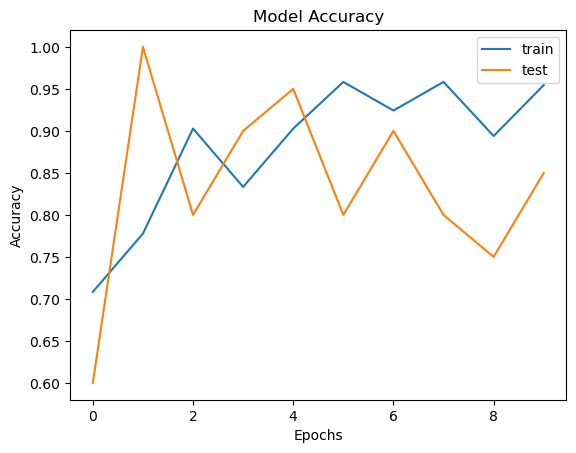

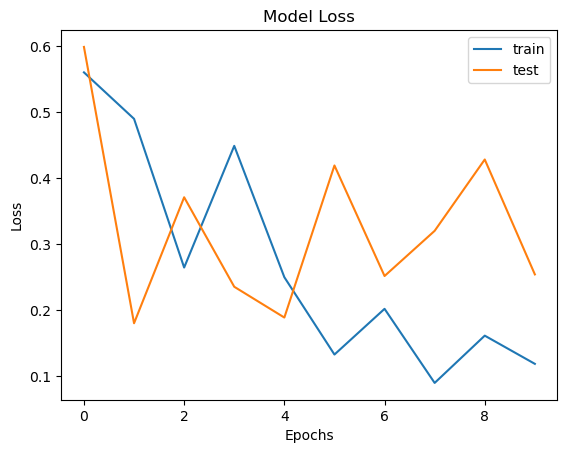

In [38]:
plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

 <h1 style="color:blue">ResNet50 example 2</h1>

In [14]:
weights= "/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = ResNet50(weights=weights, include_top=False, input_shape=(img_width, img_height, 3))

base_model.layers[0].trainable = False


model = Sequential()
model.add(base_model)

"""
reducing the spatial dimensions of the previous layer's output and obtaining a fixed-length vector representation for each feature map. 
."""
model.add(GlobalAveragePooling2D())
# add fully connected layer
model.add(Dense(256, activation='relu'))
#output layer
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

epochs = 15


model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 256)               524544    
                                                                 
 dense_12 (Dense)            (None, 2)                 514       
                                                                 
Total params: 24,112,770
Trainable params: 24,059,650
Non-trainable params: 53,120
_________________________________________________________________
Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Epoch 1/15
9/9 [======

 <h1 style="color:blue">VGG16 example </h1>

In [16]:
weights="/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

base_model = VGG16(weights=weights, include_top=False, pooling='avg')
# for layer in base_model.layers:
#     layer.trainable = False

for layer in base_model.layers[:-2]:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Dense(num_classes, activation='softmax'))


from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '/kaggle/input/apples-or-tomatoes-image-classification/train',
        target_size=(150, 150),
        batch_size=12,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/kaggle/input/apples-or-tomatoes-image-classification/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



epochs = 20

History = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=6,
        validation_data=validation_generator,
        validation_steps=1)


Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_14 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 2s 141ms/step - loss: 711.5258 - accuracy: 0.5455 - val_loss: 546.5077 - val_accuracy: 0.6000
Epoch 2/20
6/6 [==============================] - 0s 45ms/step - loss: 354.9461 - accuracy: 0.7917 - val_loss: 213.3509 - val_accuracy: 0.7500
Epoch 3/20
6/6 [==============================] - 0s 45ms/step - l

<h1 style="color: red">Choose the appropriate model</h1>
<h4>You must first specify the target of the dataset, and then search for the model closest to this data, and the closer the data is to the model, the more layers you work for. It is frozen, that is, it is not trained again.
Then there are models that care more about accuracy than speed,on the contrary, care more about speed.
</h4>
<h4>
You can view more models from Keras
https://keras.io/api/applications/</h4>
